## Universidad Técnica Particular de Loja
### Sistemas Basados en Conocimiento
### Aplicación de busqueda semántica con SPARQL y iGraph
#### Integrantes: Ramiro Vivanco - Cecilia Sanchez

In [ ]:
pip install sparqlwrapper

In [ ]:
from SPARQLWrapper import SPARQLWrapper, JSON

Ingrese la palabra a buscar Ecuador


Palabra: Ecuador
URI Palabra: http://utpl.edu.ec/ods/SKOS_Ecuador308
Documento: Philosophical reflections on Education for Sustainable Development: A complex  transdisciplinary  and biomimetic approach [Reflexões filosóficas sobre a Educação para o Desenvolvimento Sustentável: Uma abordagem complexa  transdisciplinar e biomimética]
URI Documento: http://utpl.edu.ec/ods/1014516FDE575
---------------------------
Palabra: Ecuador
URI Palabra: http://utpl.edu.ec/ods/SKOS_Ecuador231
Documento: Benchmarking agri-food sustainability certifications: Evidences from applying SAFA in the Ecuadorian banana agri-system
URI Documento: http://utpl.edu.ec/ods/101016JJCLEPRO201907054
---------------------------
Palabra: Ecuador
URI Palabra: http://utpl.edu.ec/ods/SKOS_Ecuador136
Documento: Focused coordination models towards sustainability in higher education. Case of Quevedo state technical university (Ecuador)
URI Documento: http://utpl.edu.ec/ods/103390SU12145760
---------------------------
Palabra:

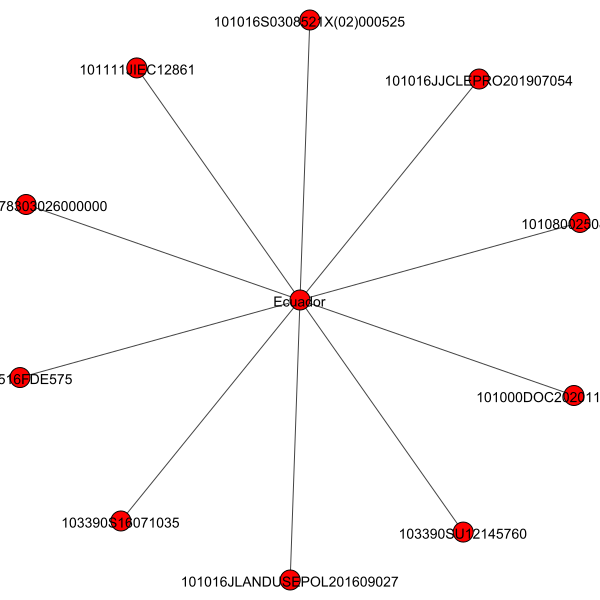

In [41]:
#Busqueda de documentos por palabras clave 
from SPARQLWrapper import SPARQLWrapper, JSON
import numpy as np 
import pandas as pd
import igraph as ig

key = input("Ingrese la palabra a buscar")#Usar Ecuador
#Conexión al respositorio de GraphDB
sparql = SPARQLWrapper("http://localhost:7200/repositories/ODS")
sparql.setQuery("""
    PREFIX bibo: <http://purl.org/ontology/bibo/>
    PREFIX dct: <http://purl.org/dc/terms/>
    PREFIX j.1: <http://www.w3.org/2004/02/skos/core#>
    select * where { 
        VALUES ?key{'"""+key+"""'}
        ?p a bibo:Document.
        ?p dct:title ?t.
        ?p bibo:doi ?doi.
        ?p dct:subject ?a.
        ?a j.1:prefLabel ?key
    } limit 10
                        """)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
#array para contar los vertices
i=1
array = []
for result in results["results"]["bindings"]:
    array.append([0,i])
    i=i+1
#print(array)
#Creacion del grafo con igraph
g = ig.Graph(array)
a = []
#Aginamos la palabra clave a la primera posicion del array para que sea la base del grafo
a.append(key)   
#Recorremos la consulta en la base
for result in results["results"]["bindings"]:
    URIP =(result["doi"]["value"])
    print("Palabra:",(result["key"]["value"]))
    print("URI Palabra:",(result["a"]["value"]))
    print("Documento:",(result["t"]["value"]))
    print("URI Documento:",(result["p"]["value"]))
    print('---------------------------')
    a.append(URIP)
#a=g.vs["name"] =key
#Imprimimos el grafo
ig.plot(g, bbox=(600,600),vertex_label=a )

Ingrese el autor a buscar Alvarado R


Autor: Alvarado R
URI Autor: http://utpl.edu.ec/ods/Alvarado_R49
Documento: Do economic development and human capital decrease non-renewable energy consumption? Evidence for OECD countries
URI Documento: http://utpl.edu.ec/ods/101016JENERGY2020119147
---------------------------
Autor: Alvarado R
URI Autor: http://utpl.edu.ec/ods/Alvarado_R27
Documento: The nexus between team culture  innovative work behaviour and tacit knowledge sharing: Theory and evidence
URI Documento: http://utpl.edu.ec/ods/103390SU13084333
---------------------------
Autor: Alvarado R
URI Autor: http://utpl.edu.ec/ods/Alvarado_R55
Documento: Convergence of the ecological footprint in Latin America: the role of the productive structure
URI Documento: http://utpl.edu.ec/ods/101007S11356021147451
---------------------------
Autor: Alvarado R
URI Autor: http://utpl.edu.ec/ods/Alvarado_R218
Documento: Interplay between technological innovation and environmental quality: Formulating the SDG policies for next 11 economie

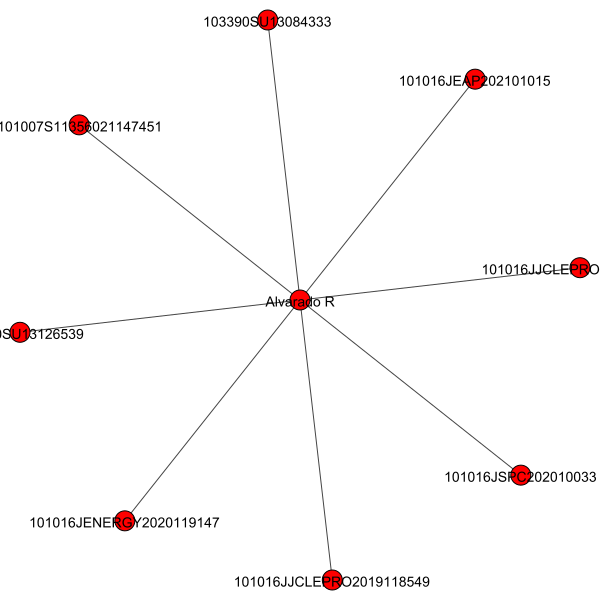

In [47]:
#Consatar cuantos documentos tiene un autor
from SPARQLWrapper import SPARQLWrapper, JSON
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import igraph as ig

key = input("Ingrese el autor a buscar")#Usar: Alvarado R
sparql = SPARQLWrapper("http://localhost:7200/repositories/ODS")
sparql.setQuery("""
                        PREFIX bibo: <http://purl.org/ontology/bibo/>
                            PREFIX dct: <http://purl.org/dc/terms/>
                            PREFIX j.3: <http://xmlns.com/foaf/0.1/>
                            select * where { 
                                VALUES ?nombre{'"""+key+"""'}
                                ?s a bibo:Document .
                                ?s dct:title ?titulo.
                                ?s bibo:doi ?doi.
                                ?s dct:creator ?p.
                                ?p j.3:name ?nombre.
                                ?p j.3:name ?nam
                            } limit 10
                            """)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
#array para contar los vertices
i=1
array = []
for result in results["results"]["bindings"]:
    array.append([0,i])
    i=i+1
#print(array)
#Creacion del grafo con igraph
g = ig.Graph(array)
a = []
#Aginamos la palabra clave a la primera posicion del array para que sea la base del grafo
a.append(key)   
#Recorremos la consulta en la base
for result in results["results"]["bindings"]:
        URIP =(result["doi"]["value"])
        print("Autor:",(result["nombre"]["value"]))
        print("URI Autor:",(result["p"]["value"]))
        print("Documento:",(result["titulo"]["value"]))
        print("URI Documento:",(result["s"]["value"]))
        print('---------------------------')
        a.append(URIP)
#a=g.vs["name"] =key
#Imprimimos el grafo
ig.plot(g, bbox=(600,600),vertex_label=a )

In [ ]:
#Cuantos autores tiene un documento
from SPARQLWrapper import SPARQLWrapper, JSON
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import igraph as ig

key = input("Ingrese el titulo del documento a buscar")
sparql = SPARQLWrapper("http://localhost:7200/repositories/ODS")
sparql.setQuery("""
                       PREFIX bibo:    <http://purl.org/ontology/bibo/> 
                        PREFIX dct:     <http://purl.org/dc/terms/> 
                        PREFIX Data: <http://utpl.edu.ec/ods/>
                        SELECT distinc *
                        WHERE { 
                        VALUES ?skos {'"""+key+"""'}
                          ?recurso dct:title ?titulo .
                          ?recurso dct:creator ?autor .
                          ?recurso dct:subject Data:SKOS_Satisfaction_with_quality_of_life409 .
                        }ORDER BY ?titulo


                            """)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
#array para contar los vertices
i=1
array = []
for result in results["results"]["bindings"]:
    array.append([0,i])
    i=i+1
#print(array)
#Creacion del grafo con igraph
g = ig.Graph(array)
a = []
#Aginamos la palabra clave a la primera posicion del array para que sea la base del grafo
a.append(key)   
#Recorremos la consulta en la base
print("Documento:",key)
for result in results["results"]["bindings"]:
        URIP =(result["autor"]["value"])
        print("Autor:",(result["nombre"]["value"]))
        print("URI Autor:",(result["autor"]["value"]))
        print('---------------------------')
        a.append(URIP)
#Imprimimos el grafo
ig.plot(g, bbox=(600,600),vertex_label=a )

In [ ]:
#Documentos que estan en español
from SPARQLWrapper import SPARQLWrapper, JSON
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import igraph as ig

key = "Documentos en español"
sparql = SPARQLWrapper("http://localhost:7200/repositories/ODS")
sparql.setQuery("""
                       PREFIX bibo:    <http://purl.org/ontology/bibo/> 
                        PREFIX dct:     <http://purl.org/dc/terms/> 
                        SELECT distinct *
                        WHERE { 
                            ?document dct:title ?titulo .
                            ?document bibo:abstract ?abstracto .
                            ?document bibo:uri ?uri .
                            ?document bibo:doi ?doi .
                            ?documente dct:language "es-ES" .
                        }limit 10
                            """)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
#array para contar los vertices
i=1
array = []
for result in results["results"]["bindings"]:
    array.append([0,i])
    i=i+1
#print(array)
#Creacion del grafo con igraph
g = ig.Graph(array)
a = []
#Aginamos la palabra clave a la primera posicion del array para que sea la base del grafo
a.append(key)   
#Recorremos la consulta en la base
print(key)
for result in results["results"]["bindings"]:
        URIP =(result["doi"]["value"])
        print("Documento:",(result["titulo"]["value"]))
        print("URI Documento:",(result["uri"]["value"]))
        print('---------------------------')
        a.append(URIP)
#Imprimimos el grafo
ig.plot(g, bbox=(600,600),vertex_label=a )

In [ ]:
#Nombre y autor de documentos que tienen como fecha el  2020 y que están en idioma ingles
from SPARQLWrapper import SPARQLWrapper, JSON
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import igraph as ig

key = "Documentos en Inglés"
sparql = SPARQLWrapper("http://localhost:7200/repositories/ODS")
sparql.setQuery(""" PREFIX bibo:    <http://purl.org/ontology/bibo/> 
                    PREFIX dct:     <http://purl.org/dc/terms/> 
                    PREFIX Data: <http://utpl.edu.ec/ods/>
                    SELECT distinct *
                    WHERE { 
                      ?recurso dct:title ?titulo .
                      ?recurso bibo:doi ?doi .
                      ?recurso bibo:abstract ?abstracto .
                      ?recurso bibo:date "2017" .
                    }limit 10
                            """)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
#array para contar los vertices
i=1
array = []
for result in results["results"]["bindings"]:
    array.append([0,i])
    i=i+1
#print(array)
#Creacion del grafo con igraph
g = ig.Graph(array)
a = []
#Aginamos la palabra clave a la primera posicion del array para que sea la base del grafo
a.append(key)   
#Recorremos la consulta en la base
print(key)
for result in results["results"]["bindings"]:
        URIP =(result["doi"]["value"])
        print("Documento:",(result["titulo"]["value"]))
        print('---------------------------')
        a.append(URIP)
#Imprimimos el grafo
ig.plot(g, bbox=(600,600),vertex_label=a )